In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame, YouTubeVideo
from ipywidgets import interact,fixed
import pandas as pd
from numpy import cos,sin,pi,tan,log,exp,sqrt,array,linspace,arange,meshgrid
from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from ipywidgets import interact

plt.rcParams["figure.figsize"] = [7,7]

from numpy.linalg import norm

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\renewcommand{\vec}{\mathbf}$

### Example

Find the minimum surface area of a lidless shoebox with volume $32 \text{ L}$.

[See demo here.](https://drew.youngren.nyc/mvc-f20/lagrange-box.html)

In [6]:
@interact
def _(lev=(3000,5600,200),angle=(-108,90,6),vangle=(0,90,6)):
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca(projection='3d')
    ax.view_init(vangle,angle)
    x = y = linspace(20,50,100)
    x,y = meshgrid(x,y)
    ax.plot_surface(x,y,32000/(x*y))
    ax.plot_surface(x,y,(lev - x*y)/(2*x + 2*y),alpha=.5)
    ax.set_zlim(0,80)

interactive(children=(IntSlider(value=4200, description='lev', max=5600, min=3000, step=200), IntSlider(value=…

**Solution**. The variables are the length, width, and height of the box. We use $x$, $y$, and $z$, all positive. The target function is surface area $$S(x,y,z) = xy + 2yz + 2xz.$$ The constraint is the fixed volume $$V(x,y,z) = xyz = 32000 \text{ cm}^3.$$

We set up Lagrange's equations

$$\nabla S = \bv{y + 2z \\ x + 2z \\ 2x + 2y} = \lambda \bv{yz \\ xz \\ xy}$$

We can exploit symmetry here and multiply the equations by $x$, $y$, and $z$, respectively, so the right hand side is $\lambda xyz = \lambda 32000$ for each. Thus, we have $$xy + 2xz = xy + 2yz = 2xz + 2yz$$ which quickly reduces to $x = y = 2z$. Finally, plugging back into the constraint, we have $$(2z)(2z)z = 4z^3 = 32000$$ so $z = 20$ and $x = y =40$. Thus the minimum surface area is $$S(40,40,20) = 4800\text{ cm}^2.$$

<p style="padding-bottom:40%;"> </p>

### Example 

Suppose the temperature distribution on the closed half-disk $0 \leq y \leq \sqrt{16-x^2}$ is given by

$$u(x,y) = x^2 - 6x + 4y^2 - 8y. $$

Find the hottest and coldest points.  

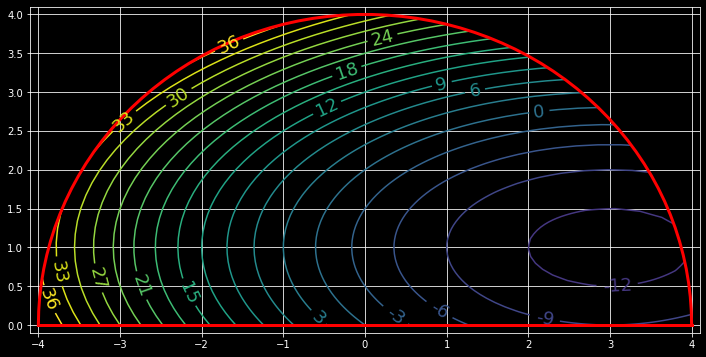

In [7]:
def u(x,y):
    return x**2 - 6*x + (4*y**2 - 8*y)
plt.figure(figsize=np.array((10,5))*1.2)
r = np.linspace(0,4,70)
th = np.linspace(0,np.pi,70)
R,T = np.meshgrid(r,th)
plt.grid(True)
cp = plt.contour(R*cos(T),R*sin(T),u(R*cos(T),R*sin(T)) ,levels=np.arange(-21,39,3))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(4*cos(th),4*sin(th),'-r',lw=3)
plt.plot(4*cos(th),np.zeros_like(th),'-r',lw=3)
plt.xlim((-4.10,4.1));
plt.ylim((-.10,4.1));

**Solution.** See [this tutorial](../tutorial/SystemsOfEquations.ipynb) for the particulars. 

<p style="padding-bottom:40%;"> </p>

### Exercise

By investing $x$ units of labor and $y$ units of capital, a low-end watch manufacturer can produce $x^{0.4}y^{0.6}$ watches. Find the maximum number of watches that can be produced with a budget of $\$20000$ if labor costs $\$100$ per unit and capital costs $\$200$ per unit.

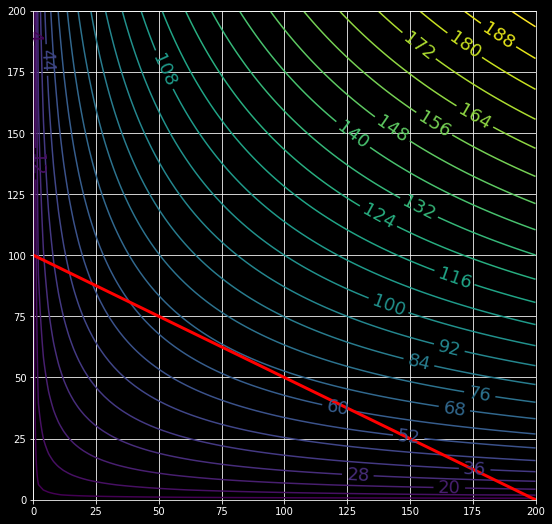

In [8]:
x = y = np.linspace(0,200,100)
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(9,9))

plt.grid(True)
cp = plt.contour(X,Y,X**.4*Y**.6,levels=np.arange(4,200,8))
plt.clabel(cp,fmt = "%d",fontsize=18);
plt.plot(x,100 - x/2,'-r',lw=3);
# plt.ylim((-2,2));

**Solution.** The variables are given and clearly we want to maximize watches $$w(x,y) = x^{2/5}y^{3/5}$$ the well-known Cobb-Douglas model. The constraint is the budget $$b(x,y) = 100x + 200y = 20000$$ which is a linear function. 

We compute $$\nabla w = \bv{\frac25(y/x)^{3/5} \\ \frac35(x/y)^{2/5}} = \lambda \bv{100 \\ 200}$$ which looks bad until you realize you divide both sides of the two equations and everything collapses quite nicely. 

$$ \frac{(y/x)^{3/5}}{(x/y)^{2/5}} = \frac{2y}{3x} = \frac12 $$ so $y = \frac34w$. Plug into constraint to get $250x = 20000$, so the maximum no. of watches is $$w(80,60) \approx 67.$$

In [9]:
80**.4*60**.6

67.31730872677197